# Classification of breast cancer data  [35 points]

You will implement a Support Vector Machine (SVM) model for the classification of breast cancer data and compare its performance with K-nearest Neighbors.

#### Loading the data

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
## loading the raw data using pandas
bc=pd.read_csv('data.csv')
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Pre-process and understand data (5 pts)

The data label is the diagnosis (M = malignant, B = benign).

**Question (2pts):** Convert diagnosis column to binary 0-1 label where 1 incidates malignancy.

In [66]:
## convert diagnosis to numerical label (M = malignant, B = benign)
#drop the last column of NaN
y = bc.iloc[:, :-1]

#drop the id column
y = y.iloc[:, 1:]


y['diagnosis'] = pd.to_numeric(y['diagnosis'].replace("M", 1).replace("B", 0))

y.head() # response variable

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Question (3pts):** Plot the first 2 features against diagnosis. Is the data linearly separable and what happens if we fit a hard-margin SVM to the data?

***The data are not linearly separable, so if we try to fit a hard margin SVM, we will fail.***

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

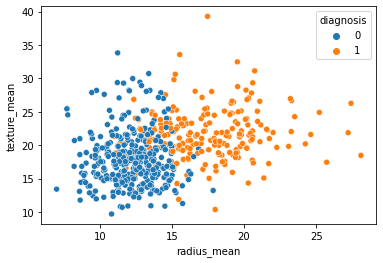

In [67]:
##plotting the the first 2 features against diagnosis
sns.scatterplot(data=y, x="radius_mean", y="texture_mean", hue="diagnosis")

#### Splitting the data: training and test 

In [68]:
from sklearn.model_selection import train_test_split

X = y.iloc[:,y.columns != 'diagnosis']
y = y.iloc[:,y.columns == 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1. Support Vector Machine (SVM) (20 pts)

**Question (15pts):** Train and test a SVM model with the following requirements:
- Use GridSearchCV to find the best combination of model hyper-parameters: kernel: {linear, rbf}; for both kernel, C:{1, 10, 100, 1000}; for rbf kernel 'gamma' = {1e-3, 1e-4, 1e-5}.
- Try both accuracy and recall metric as scoring function in GridSearchCV
- Report the best hyper-parameter setting for each metric
- Report and plot the confusion matrix of the best estimator for each metric

# Tuning hyper-parameters for recall


C:\Users\bcper\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'C': 100, 'kernel': 'linear'}
[[86  4]
 [ 1 52]]
# Tuning hyper-parameters for accuracy


C:\Users\bcper\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'C': 100, 'kernel': 'linear'}
[[86  4]
 [ 1 52]]


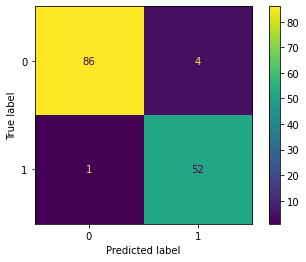

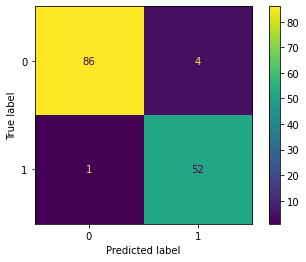

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

svc = SVC()
param_grid = [{'kernel':['linear'], 'C':[1, 10, 100, 1000]}, 
             {'kernel':['rbf'], 'C':[1, 10, 100, 1000], 'gamma': [1e-3, 1e-4, 1e-5]}]
scores = {'accuracy', 'recall'}
for sc in scores:
    grid=GridSearchCV(svc, param_grid=param_grid, cv=5, scoring=sc, n_jobs=-1, 
                    return_train_score=True)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    
    svc = grid.best_estimator_
    
    y_pred_svc =svc.predict(X_test)
    ## computing and plotting confusion matrix
    print(grid.best_params_)
    
    plot_confusion_matrix(svc, X_test, y_test)    
    print(confusion_matrix(y_test, y_pred_svc))
    

**Question (5pts):** Fit an SVM model to a slice of data that contains only the first 2 features and visualize decision boudary based on these two features.

In [41]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C:\Users\bcper\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


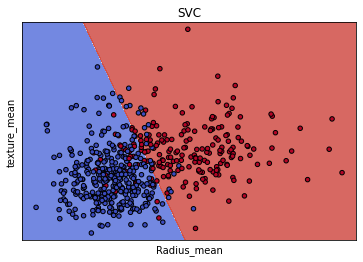

In [51]:
from sklearn import metrics

## for display purposes, we fit the model on the first two features
clf = svc.fit(X_train.iloc[:,:2],y_train)

## Plotting the decision boundary for all data (both train and test)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.iloc[:,0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('texture_mean')
ax.set_xlabel('Radius_mean')
ax.set_xticks(())
ax.set_yticks(())
plt.title('SVC')
plt.show()



### 2. K-nearest Neighbors classifier (10pts)

**Question:** Repeat all the tasks for SVM to train a kNN classifier where the hyper-parameter is only k (number of neighbors) ranging from 1 to 50 in kNN. Compare the results with those of SVM, which classifier gives better results?

***The SVM is not only simpler, but also has fewer false negatives than the knn.  Since this is a cancer diagnosis, we would prefer a classifier which prodices fewer false negatives and we tolerate more false positives.***

C:\Users\bcper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k = KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
[[88  2]
 [ 4 49]]
k = KNeighborsClassifier(n_jobs=-1, n_neighbors=13)
[[88  2]
 [ 4 49]]


C:\Users\bcper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


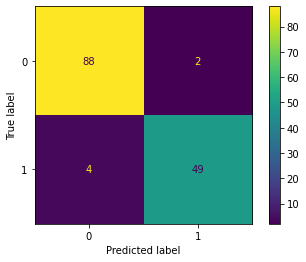

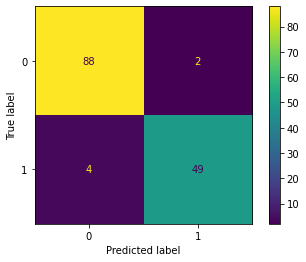

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_jobs = -1)

k_range=range(1,50,1)
param_grid=dict(n_neighbors=k_range)
scores = {'accuracy', 'recall'}
for sc in scores:
    grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring=sc, n_jobs=-1, 
                    return_train_score=True)
    
    grid_knn.fit(X_train,y_train)
    
    knn = grid_knn.best_estimator_
    
    y_pred_knn = knn.predict(X_test)
    ## computing and plotting confusion matrix
    print(grid_knn.best_params_)

    plot_confusion_matrix(knn, X_test, y_test)  
   
    print(confusion_matrix(y_test, y_pred_knn))
    

C:\Users\bcper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


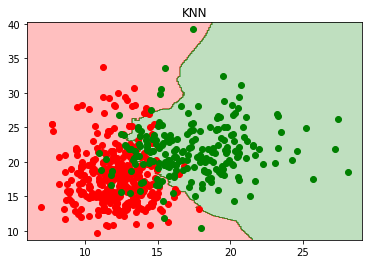

In [87]:
from matplotlib.colors import ListedColormap

knn.fit(X_train.iloc[:, 0:2], y_train)
## Plotting the decision boundary for all data (both train and test)

X_set, y_set = X.values, y.values

# creating a meshgrid where each point is classifed using learned kNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = .1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = .1))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


plt.scatter(x=X_set[y_set.ravel() == 0,0],y=X_set[y_set.ravel() == 0,1], c = 'red', label = '0 class')

# scatter plot: Observations from X_set's first dimension vs X_set's second dimension 
# such that observations belong to class 1
plt.scatter(x=X_set[y_set.ravel() == 1,0],y=X_set[y_set.ravel() == 1,1], c = 'green', label = '1 class')


plt.title('KNN')
plt.show()

***Repeated from above: The SVM is not only simpler, but also has fewer false negatives than the knn.  Since this is a cancer diagnosis, we would prefer a classifier which prodices fewer false negatives and we tolerate more false positives.***